# 5. Korpusverarbeitung mit pandas

- Dataframes und Series 
- Dataframe erstellen und Daten einlesen
- Data Selection / Filtering
- String-Methoden (`.str.split()`, `str.contains()`, `str.len()`)
- Operationen (Aggregationen, Statistik; `apply()`, `value_counts()`, `mean()`)
- Visualisierungmethoden (`plot()`, `hist()`)


- pandas Getting Started: https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html
- pandas User Guide: https://pandas.pydata.org/docs/user_guide/index.html


## 1. pandas 

- pandas (*Python Data Analysis Library*) ist eine beliebte open-source Python-Library für Datenmanipulation und -analyse
- bietet ähnliche Funktionalität wie die Statistik-Programmiersprache R
- hat Werkzeuge zum Lesen und Schreiben verschiedener Dateiformate (csv, xml, json)
- Hauptdatenstruktur sind numerische Tabellen (**Dataframes**)

- pandas bietet Methoden zur einfachen Visualisierung von Daten in pandas-Formaten an (unter Verwendung von matplotlib)
- üblicherweise wird neben pandas und matplotlib auch numpy geladen (grundlegendes Paket für das Arbeiten mit mehrdimensionalen Datenstrukturen)


In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

---
##  2. Datenstrukturen

- https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html

---

### Series()

- eine Series ist ein eindimensionales Array, das unterschiedliche Datentyp aufnehmen kann (Integer, String, Fließkommazahl, Python-Objekt usw.)
- https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#series
- https://pandas.pydata.org/docs/reference/api/pandas.Series.html



In [2]:
#Creating a Series by passing a list of values, letting pandas create a default integer index:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


### DataFrame()

- ein DataFrame ist eine tabellarische, zweidimensionale Datenstruktur
  - jede Spalte: enthält die Werte einer Variablen
  - jede Zeile: enthält für einen Datensatz (Beobachtung/Dokument) die Werten der verschiedenen Variablen


- https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html


In [3]:
#Creating a DataFrame by passing a dictionary of objects that can be converted into a series-like structure:
data_frame = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
data_frame

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


---
##  3. Korpusverabreitung


#### Beispielkorpus: CSV-Headline-Dataset

- Subset des ***ABC News Million Headlines Corpus*** (https://www.kaggle.com/therohk/million-headlines/data):
    - Text + Metadata (publish date)
    - tabulares Format (csv)

###  read_csv()

- Methode zum Einlesen von csv-Daten als pandas-DataFrame
- Angabe von Separator und Lineterminator möglich, ebenso ggf. der Kodierung
- https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html


Im Folgenden wird das abcnews-Korpus eingelesen:

In [4]:
#data: https://www.kaggle.com/therohk/million-headlines/data
df = pd.read_csv('abcnews-2020.csv', sep=",", lineterminator='\n')
df.head()

,publish_date,headline_text
0,20200101,a new type of resolution for the new year
1,20200101,adelaide records driest year in more than a de...
2,20200101,adelaide riverbank catches alight after new ye...
3,20200101,adelaides 9pm fireworks spark blaze on riverbank
4,20200101,archaic legislation governing nt women propert...


### shape

In [5]:
# number of data records
df.shape

(40240, 2)

### isnull() usw.

In [6]:
# check for missing data
df.isnull().any().sum()

0

### drop_duplicates() usw.

In [7]:
# check for duplicates
df['headline_text'].duplicated().any()

True

In [8]:
# remove duplicates
df = df.drop_duplicates('headline_text')
df.shape

(39609, 2)

### to_datetime()

- pandas hat Methoden zum Umgang mit Zeitreihen (time series)
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html


Im Folgenden wird das als DataFrame eingelesene Korpus basierend auf der pandas-Datumsmethode `to_datetime()` aktualisiert, indem eine neue Spalte `DateTime` hinzugefügt wird:

In [9]:
df['DateTime'] = pd.to_datetime(df['publish_date'].astype(str), format='%Y%m%d')

### head()

In [10]:
df.head()

,publish_date,headline_text,DateTime
0,20200101,a new type of resolution for the new year,2020-01-01
1,20200101,adelaide records driest year in more than a de...,2020-01-01
2,20200101,adelaide riverbank catches alight after new ye...,2020-01-01
3,20200101,adelaides 9pm fireworks spark blaze on riverbank,2020-01-01
4,20200101,archaic legislation governing nt women propert...,2020-01-01


### Filtern von Datensätzen (Zeilen)

Anschließend wird eine Subselection nach einem Kriterium der neuen `DateTime`-Spalte (basierend auf einem Zeitintervall) durchgeführt:

In [11]:
import datetime
print(datetime.date(2020,12,1))

2020-12-01


In [12]:
df_2020_12 = df[df['DateTime']>'2020-12-1']
#df_2020_12.head()

In [13]:
df_2020_12.shape

(2996, 3)

---
##  4. Frequenzauswertungen


### value_counts()

Als eine erste Analyse dieses Teilkorpus wird mit `value_counts()` ein Zählung der Dokumente (Zeilen) pro Datum (Spalte `DateTime`) vorgenommen:

In [14]:
df_2020_12['DateTime'].value_counts()

2020-12-10    149
2020-12-02    145
2020-12-03    143
2020-12-17    138
2020-12-16    133
2020-12-18    132
2020-12-09    131
2020-12-08    130
2020-12-14    129
2020-12-15    128
2020-12-07    126
2020-12-11    125
2020-12-04    117
2020-12-22    111
2020-12-23    100
2020-12-21    100
2020-12-24     89
2020-12-29     83
2020-12-30     83
2020-12-13     81
2020-12-31     80
2020-12-19     74
2020-12-12     70
2020-12-06     69
2020-12-20     68
2020-12-28     64
2020-12-05     62
2020-12-26     50
2020-12-27     48
2020-12-25     38
Name: DateTime, dtype: int64

---
## 5. Visualierung

### plot()

- mit der `plot()`-Methode von pandas können Daten direkt visualisiert werden
- sie bietet verschiedene Arten von Plots an, etwa `bar` für Barchats, `barh` für horizontale Barcharts etc.
- die Visualisierungsmethoden von pandas basieren auf matplotlib, diese Library muss also geladen sein

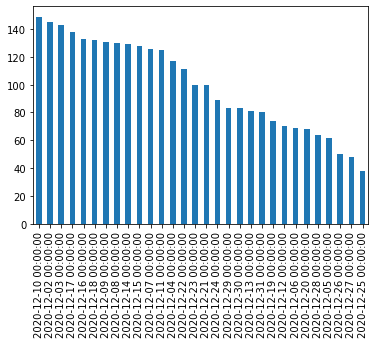

In [15]:
## Create Barplot:
df_2020_12['DateTime'].value_counts().plot(kind = 'bar');

---
## 6. Sortierung

### sort_index()


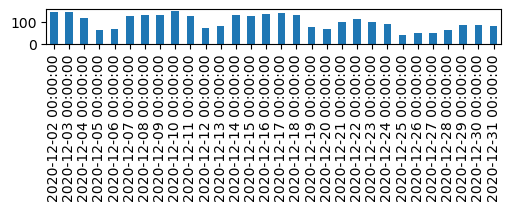

In [16]:
## sort_index and style Barplot:
data = df_2020_12['DateTime'].value_counts().sort_index()

fig = plt.figure(figsize=(5,2), dpi=100)
data.plot(kind = 'bar')
plt.tight_layout(pad=0.3)
plt.show()

### sort_values()


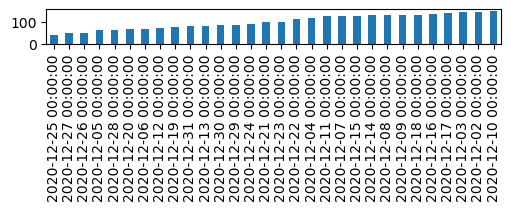

In [17]:
data = data.sort_values()

fig = plt.figure(figsize=(5,2), dpi=100)
data.plot(kind = 'bar')
plt.tight_layout(pad=0.3)
plt.show()

## 7. Stringmethoden

- pandas enthält eine Vielzahl von Methoden zur Verarbeitung von Textdaten und zur Textanalyse
- die Methoden werden auf eine Spalte (Series), die String-Daten enthält, angewendet 
- https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

### str.contains()

Folgendes Beispiel filtert das DataFrame basierend auf einer Suche nach Vorkommen eines Keywords in der Text-Spalte `headline_text` des DataFrame:

In [18]:
df_2020_12_contains_airport = df_2020_12[df_2020_12['headline_text'].str.contains("airport")]
len(df_2020_12_contains_airport)

12

In [19]:
df_2020_12_contains_airport

,publish_date,headline_text,DateTime
37863,20201207,simon birmingham tells nsw police to tighten a...,2020-12-07
37864,20201207,sydney airport breach which let passengers tra...,2020-12-07
38151,20201210,$9m wentworth airport upgrade set to open,2020-12-10
38292,20201210,video shows groupers swimming in brisbane airp...,2020-12-10
38300,20201210,wildlife at the brisbane airport,2020-12-10
39107,20201217,wa police tell nsw passengers at perth airport,2020-12-17
39401,20201221,confusion at adelaide airport and sa nsw border,2020-12-21
39439,20201221,nsw coronavirus new sydney venues and airport ...,2020-12-21
39820,20201225,south australia travellers reunite with family...,2020-12-25
39964,20201228,melbourne airport link to use elevated track,2020-12-28


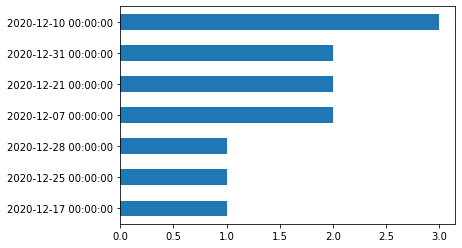

In [20]:
df_2020_12_contains_airport['DateTime'].value_counts().sort_values().plot(kind = 'barh');

### str.split()

- diese Methode splittet die Textdaten (mit Space als Default-Separator) in einer DataFrame-Spalte (Series) in Listen
- es wird also eine Tokenisierung durchgeführt

In [21]:
df_2020_12_contains_airport['headline_text'].str.split()

37863    [simon, birmingham, tells, nsw, police, to, ti...
37864    [sydney, airport, breach, which, let, passenge...
38151    [$9m, wentworth, airport, upgrade, set, to, open]
38292    [video, shows, groupers, swimming, in, brisban...
38300               [wildlife, at, the, brisbane, airport]
39107    [wa, police, tell, nsw, passengers, at, perth,...
39401    [confusion, at, adelaide, airport, and, sa, ns...
39439    [nsw, coronavirus, new, sydney, venues, and, a...
39820    [south, australia, travellers, reunite, with, ...
39964    [melbourne, airport, link, to, use, elevated, ...
40166    [at, least, 20, killed, in, explosion, at, yem...
40169    [blast, and, gunfire, at, aden, yemen, airport...
Name: headline_text, dtype: object

---
## 8. Statistische Korpusberechnungen


### apply() + mean()

Im folgenden werden die Texte des Korpus gesplittet und anschließend der Durchschnitt der Textlängen berechnet, indem mit apply() diese Längenberechnung zunächst für jeden Datensatz (Zeile) durchgeführt wird.

#### Durchschnittliche Textlänge in Wörtern:

In [22]:
print("average word count: ", df['headline_text'].str.split().apply(len).mean())

average word count:  7.961170441061375


In [23]:
#apply(len) für die gerade getroffene Kurz-Auswahl zur Erläuterung:
print(df_2020_12_contains_airport['headline_text'].str.split().apply(len))

37863    9
37864    9
38151    7
38292    8
38300    5
39107    8
39401    8
39439    8
39820    9
39964    7
40166    9
40169    8
Name: headline_text, dtype: int64


#### Durchschnittliche Textlänge in Buchstaben:

In [24]:
print("average character count: ", df['headline_text'].str.len().mean())

average character count:  52.541316367492236


In [25]:
#apply(len) für die gerade getroffene Kurz-Auswahl zur Erläuterung:
print(df_2020_12_contains_airport['headline_text'].str.len())

37863    63
37864    62
38151    41
38292    56
38300    32
39107    46
39401    47
39439    51
39820    63
39964    44
40166    48
40169    50
Name: headline_text, dtype: int64


---
## 9. Weitere Visualisierungen

### hist()

Histogramm der durchschnittliche Textlängen in Buchstaben:

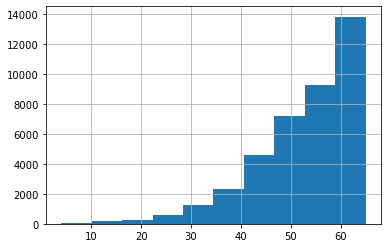

In [26]:
df['headline_text'].str.len().hist();

### boxplot()

Boxplot der durchschnittliche Textlängen in Buchstaben:

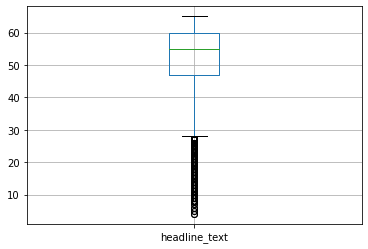

In [27]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
pd.DataFrame(df['headline_text'].str.len()).boxplot();

---
# &Uuml;bungsaufgaben 5



## Aufgabe 1 (Frequenzliste mit pandas)

### Aufgabe 1a
Berechnen Sie für folgende Tokenliste die Frequenzliste mit pandas, indem Sie die Liste in eine pandas-Series umwandeln:

In [28]:
text = ['Call', 'me', 'Ishmael', '.', 'Call', 'me', 'Ahab', '.', 'Call', 'him', 'Ahab', '.']

### Aufgabe 1b
Wandeln Sie folgendes Mini-Satzkorpus in ein pandas-Dataframe mit Spalte `texts` um und zählen Sie anschließend die Tokens, indem Sie die String-Methode `str.split()` auf diese Spalte anwenden:

In [29]:
corpus = ['Call me Ishmael .', 'Call me Ahab.', 'Call him Ahab.']

## Aufgabe 2 (Textverarbeitung mit pandas)

Lesen Sie den Wahlverwandschaften-Text zeilenweise in ein pandas-Dataframe ein und führen Sie anschließend untenstehende Korpusanalysen aus.

### Aufgabe 2a 
Tokenisieren Sie den Text und erstellen Sie eine Frequenzliste.

### Aufgabe 2b

Erstellen Sie eine Stopwort-gefilterte Frequenzliste.

### Aufgabe 2c
Berechnen Sie die durchschnittliche Zeilen- und Wortlänge.

## Aufgabe 3 (Bigramme mit pandas und NLTK)

Berechnen Sie auf dem Wahlverwandschaften-Text eine Stopwort-gefilterte Bigramm-Frequenzliste mit pandas-Dataframe und NLTK ngrams.

In [31]:
from nltk import ngrams

In [32]:
from nltk.corpus import stopwords
stop = stopwords.words('german')
stop[0:10]

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']

## Aufgabe 4 (Bigramme mit pandas und scikit-learn)

Berechnen Sie auf dem Wahlverwandschaften-Text eine Stopwort-gefilterte Bigramm-Frequenzliste mit pandas-Dataframe und dem CountVectorizer von scikit-learn:

In [33]:
#Beispiel CountVectorizer:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words='english', ngram_range=(2,2))

## Aufgabe 5 (UD-Korpusanalyse mit pandas)

Lesen Sie das UD-Korpus https://raw.githubusercontent.com/proiel/proiel-treebank/master/latin-nt.conll in ein pandas-Dataframe ein und führen Sie dieselben Korpusanalysen wie in obigen Aufgaben aus. Visualisieren Sie auch die Ergebnisse.